# Predict Smoking Status

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d kukuroo3/body-signal-of-smoking

Dataset URL: https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking
License(s): CC0-1.0
 88%|█████████████████████████████████▌    | 3.00M/3.40M [00:02<00:00, 2.07MB/s]
100%|██████████████████████████████████████| 3.40M/3.40M [00:02<00:00, 1.74MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Predict Smoking Status/body-signal-of-smoking.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Predict Smoking Status')
zip_ref.close()

## Explratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('smoking.csv')

In [5]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [6]:
df.shape

(55692, 27)

In [7]:
df.size

1503684

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [9]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

ID                     55692
gender                     2
age                       14
height(cm)                13
weight(kg)                22
waist(cm)                566
eyesight(left)            19
eyesight(right)           17
hearing(left)              2
hearing(right)             2
systolic                 130
relaxation                95
fasting blood sugar      276
Cholesterol              286
triglyceride             390
HDL                      126
LDL                      289
hemoglobin               145
Urine protein              6
serum creatinine          38
AST                      219
ALT                      245
Gtp                      488
oral                       1
dental caries              2
tartar                     2
smoking                    2
dtype: int64

In [13]:
df['smoking'].value_counts()

smoking
0    35237
1    20455
Name: count, dtype: int64

## Data Visualization

In [ ]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [15]:
# Dropping ID column

df.drop(columns=['ID'], inplace=True)

In [16]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [17]:
X = df.drop(columns=['smoking'])
y = df['smoking']

In [18]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [19]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [21]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.710566478139869, 0.743513780411168, 0.7812191399587036, 0.8317622766855194, 0.7426160337552743, 0.7586856988957716, 0.8085106382978723, 0.7776281533351288, 0.7208007900170572]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78      7027
           1       0.62      0.55      0.58      4112

    accuracy                           0.71     11139
   macro avg       0.69      0.68      0.68     11139
weighted avg       0.70      0.71      0.71     11139

Confusion Matrix:
 [[5661 1366]
 [1858 2254]]


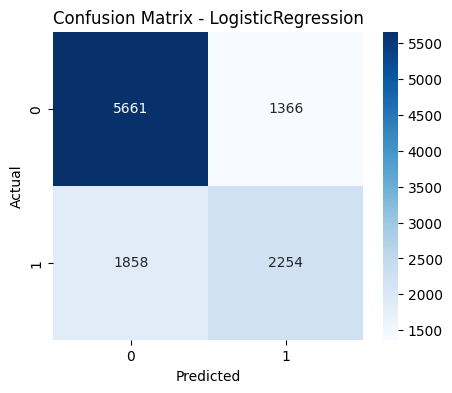

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79      7027
           1       0.63      0.73      0.68      4112

    accuracy                           0.74     11139
   macro avg       0.73      0.74      0.73     11139
weighted avg       0.75      0.74      0.75     11139

Confusion Matrix:
 [[5296 1731]
 [1126 2986]]


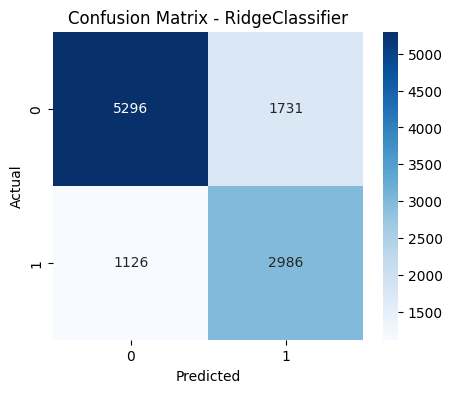

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      7027
           1       0.70      0.72      0.71      4112

    accuracy                           0.78     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.78      0.78      0.78     11139

Confusion Matrix:
 [[5739 1288]
 [1149 2963]]


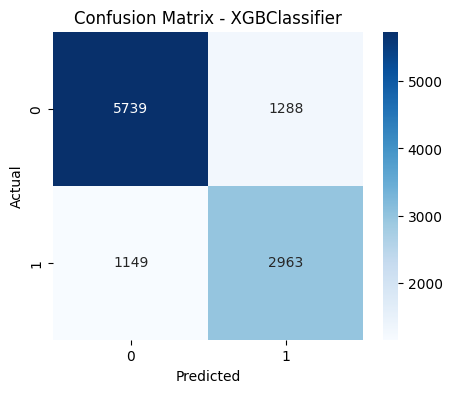

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.76      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139

Confusion Matrix:
 [[5993 1034]
 [ 857 3255]]


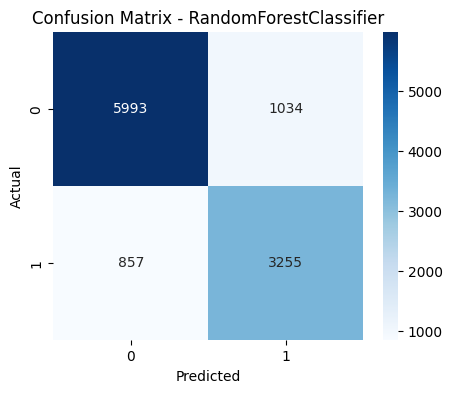

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      7027
           1       0.64      0.69      0.67      4112

    accuracy                           0.74     11139
   macro avg       0.73      0.73      0.73     11139
weighted avg       0.75      0.74      0.74     11139

Confusion Matrix:
 [[5424 1603]
 [1264 2848]]


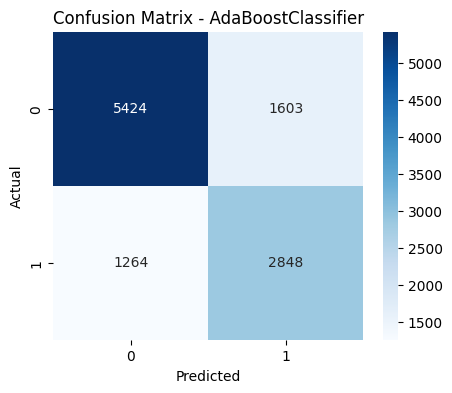

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      7027
           1       0.66      0.71      0.69      4112

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.74     11139
weighted avg       0.76      0.76      0.76     11139

Confusion Matrix:
 [[5527 1500]
 [1188 2924]]


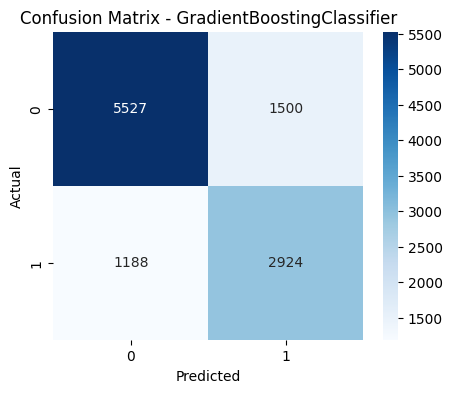

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      7027
           1       0.76      0.70      0.73      4112

    accuracy                           0.81     11139
   macro avg       0.80      0.79      0.79     11139
weighted avg       0.81      0.81      0.81     11139

Confusion Matrix:
 [[6142  885]
 [1238 2874]]


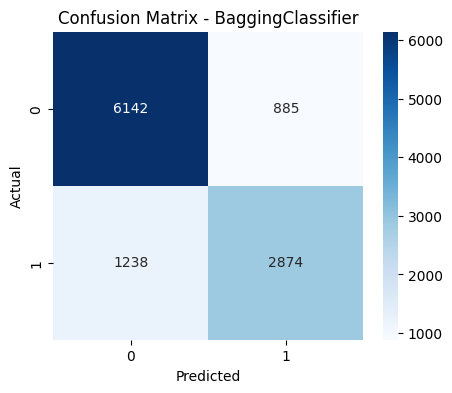

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      7027
           1       0.69      0.70      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.78      0.78      0.78     11139

Confusion Matrix:
 [[5758 1269]
 [1226 2886]]


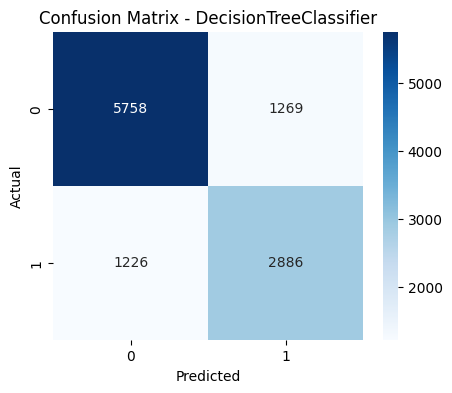

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79      7027
           1       0.65      0.54      0.59      4112

    accuracy                           0.72     11139
   macro avg       0.70      0.68      0.69     11139
weighted avg       0.71      0.72      0.71     11139

Confusion Matrix:
 [[5813 1214]
 [1896 2216]]


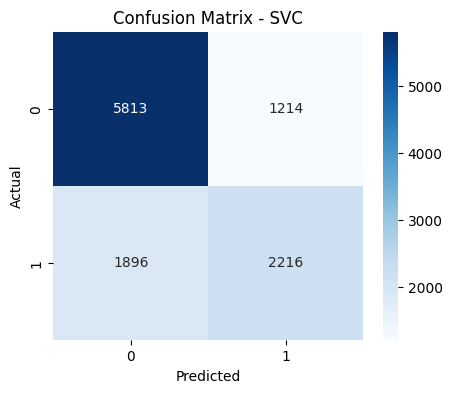

In [22]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()